In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 1: Regresión logística
from sklearn.linear_model import LogisticRegression

#MODELO 2: KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report

## DATAFRAME

In [58]:
df = pd.read_csv("../data/raw/Predict Hair Fall.csv")
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [60]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


## VISUALIZACIONES

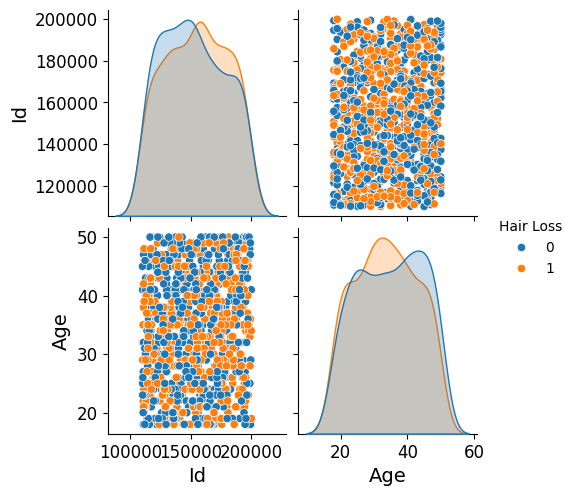

In [61]:
sns.pairplot(df, hue = "Hair Loss")

<Axes: >

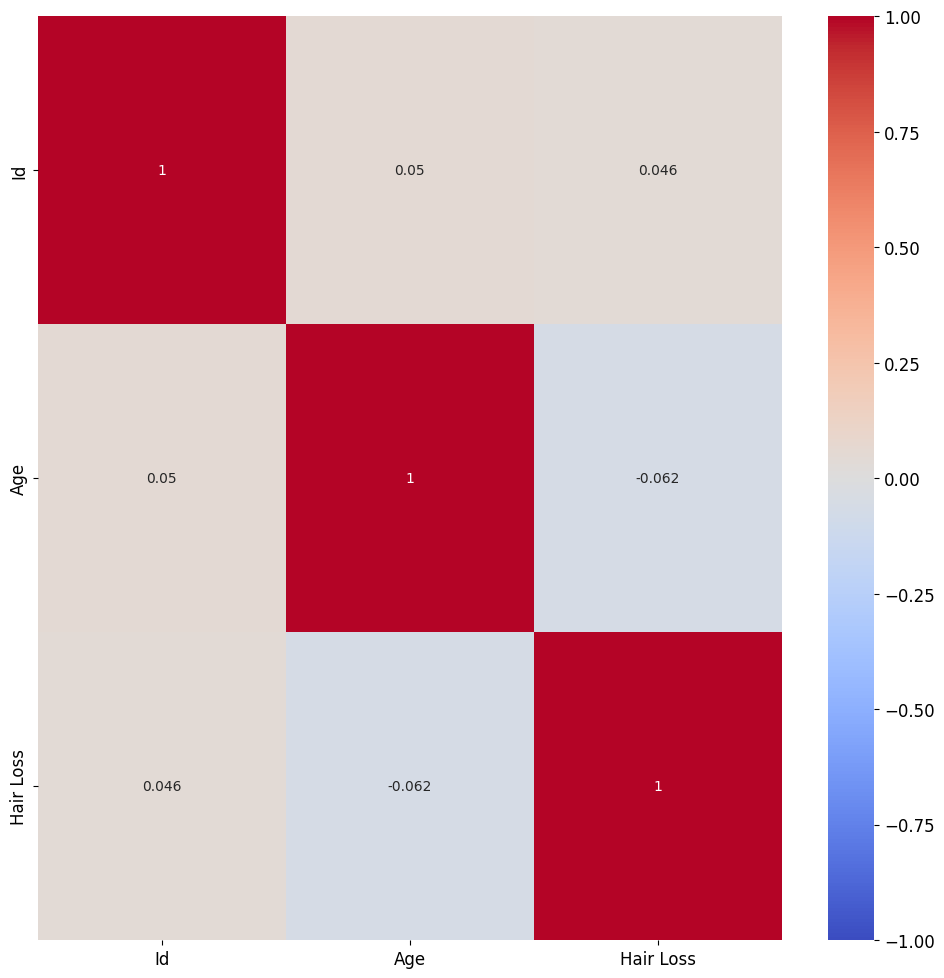

In [62]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

## LIMPIEZA

In [63]:
df["Environmental Factors"].unique()

array(['Yes', 'No'], dtype=object)

In [64]:
print(df["Genetics"].value_counts().unique())
print(df["Hormonal Changes"].value_counts().unique())
print(df["Poor Hair Care Habits "].value_counts().unique())
print(df["Environmental Factors"].value_counts().unique())
print(df["Smoking"].value_counts().unique())
print(df["Weight Loss "].value_counts().unique())
print(df["Hair Loss"].value_counts().unique())

	

[522 477]
[509 490]
[507 492]
[508 491]
[519 480]
[527 472]
[502 497]


In [65]:
df['Hair Loss'].unique()


array([0, 1])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

orden = [['No','Yes']]

encoder = OrdinalEncoder(categories=orden)
df['Genetics_encoder'] = encoder.fit_transform(df[['Genetics']])

encoder = OrdinalEncoder(categories=orden)
df['Hormones_encoder'] = encoder.fit_transform(df[['Hormonal Changes']])

encoder = OrdinalEncoder(categories=orden)
df['HairCare_encoder'] = encoder.fit_transform(df[['Poor Hair Care Habits ']])

encoder = OrdinalEncoder(categories=orden)
df['Environment_encoder'] = encoder.fit_transform(df[['Environmental Factors']])

encoder = OrdinalEncoder(categories=orden)
df['Smoking_encoder'] = encoder.fit_transform(df[['Smoking']])

encoder = OrdinalEncoder(categories=orden)
df['Weight_encoder'] = encoder.fit_transform(df[['Weight Loss ']])


df

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0,1.0,0.0,1.0,1.0,0.0,0.0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0,0.0,0.0,1.0,1.0,0.0,0.0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0,0.0,0.0,1.0,1.0,0.0,1.0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0,1.0,1.0,1.0,1.0,0.0,0.0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1,1.0,0.0,1.0,1.0,1.0,1.0
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0,1.0,1.0,0.0,0.0,0.0,1.0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1,0.0,1.0,1.0,0.0,1.0,1.0
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1,0.0,1.0,1.0,1.0,1.0,1.0


In [67]:
df["Stress"].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [68]:
print(df["Stress"].value_counts().unique())


[351 327 321]


In [69]:
print(df['Stress'].apply(repr).unique())


["'Moderate'" "'High'" "'Low'"]


In [70]:

df = df.copy()

# Verifica otra vez los valores únicos por si acaso
print("Valores únicos antes del mapeo:", df['Stress'].unique())

# Mapeo directo
stress_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}

df['Stress'] = df['Stress'].map(stress_mapping)

# Revisa resultado
print("Valores únicos después del mapeo:", df['Stress'].unique())


Valores únicos antes del mapeo: ['Moderate' 'High' 'Low']
Valores únicos después del mapeo: [1 2 0]


In [71]:
df

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,1,19,Yes,Yes,No,No,0,1.0,0.0,1.0,1.0,0.0,0.0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,2,43,Yes,Yes,No,No,0,0.0,0.0,1.0,1.0,0.0,0.0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,1,26,Yes,Yes,No,Yes,0,0.0,0.0,1.0,1.0,0.0,1.0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,1,46,Yes,Yes,No,No,0,1.0,1.0,1.0,1.0,0.0,0.0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,1,30,No,Yes,Yes,No,1,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,0,33,Yes,Yes,Yes,Yes,1,1.0,0.0,1.0,1.0,1.0,1.0
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,0,47,No,No,No,Yes,0,1.0,1.0,0.0,0.0,0.0,1.0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,1,20,Yes,No,Yes,Yes,1,0.0,1.0,1.0,0.0,1.0,1.0
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,1,32,Yes,Yes,Yes,Yes,1,0.0,1.0,1.0,1.0,1.0,1.0


In [72]:
"""stress_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}

df['Stress'] = df['Stress'].map(stress_mapping)

df"""


"stress_mapping = {\n    'Low': 0,\n    'Moderate': 1,\n    'High': 2\n}\n\ndf['Stress'] = df['Stress'].map(stress_mapping)\n\ndf"

In [73]:
df["Nutritional Deficiencies "].unique()

array(['Magnesium deficiency', 'Protein deficiency', 'Biotin Deficiency ',
       'Iron deficiency', 'Selenium deficiency', 'Omega-3 fatty acids',
       'Zinc Deficiency', 'Vitamin A Deficiency', 'Vitamin D Deficiency',
       'No Data', 'Vitamin E deficiency'], dtype=object)

In [74]:
print(df["Nutritional Deficiencies "].value_counts()["No Data"])


80


In [75]:
df.groupby(df["Nutritional Deficiencies "].str.strip())["Hair Loss"].mean().sort_values(ascending=False)


Nutritional Deficiencies 
Magnesium deficiency    0.547619
No Data                 0.525000
Protein deficiency      0.522222
Vitamin A Deficiency    0.515152
Iron deficiency         0.512821
Selenium deficiency     0.512195
Vitamin D Deficiency    0.500000
Zinc Deficiency         0.472222
Biotin Deficiency       0.464646
Vitamin E deficiency    0.457831
Omega-3 fatty acids     0.456522
Name: Hair Loss, dtype: float64

In [76]:
df["Medical Conditions"].unique()

array(['No Data', 'Eczema', 'Dermatosis', 'Ringworm', 'Psoriasis',
       'Alopecia Areata ', 'Scalp Infection', 'Seborrheic Dermatitis',
       'Dermatitis', 'Thyroid Problems', 'Androgenetic Alopecia'],
      dtype=object)

In [77]:
print(df["Medical Conditions"].value_counts()["No Data"])


110


In [78]:
df.groupby(df["Medical Conditions"].str.strip())["Hair Loss"].mean().sort_values(ascending=False)

Medical Conditions
Alopecia Areata          0.570093
Seborrheic Dermatitis    0.568182
Androgenetic Alopecia    0.561224
Psoriasis                0.500000
Dermatosis               0.488636
Scalp Infection          0.481013
Dermatitis               0.478261
Ringworm                 0.478261
Eczema                   0.478261
Thyroid Problems         0.434343
No Data                  0.427273
Name: Hair Loss, dtype: float64

In [79]:
df["Medications & Treatments"].unique()

array(['No Data', 'Antibiotics', 'Antifungal Cream', 'Accutane',
       'Chemotherapy', 'Steroids', 'Rogaine', 'Blood Pressure Medication',
       'Immunomodulators', 'Antidepressants ', 'Heart Medication '],
      dtype=object)

In [80]:
print(df["Medications & Treatments"].value_counts()["No Data"])

2


In [81]:
df.groupby(df["Medications & Treatments"].str.strip())["Hair Loss"].mean().sort_values(ascending=False)


Medications & Treatments
Steroids                     0.551402
Antibiotics                  0.531915
Chemotherapy                 0.511111
Heart Medication             0.509615
Rogaine                      0.508621
No Data                      0.500000
Accutane                     0.490196
Antidepressants              0.481818
Antifungal Cream             0.468085
Blood Pressure Medication    0.466667
Immunomodulators             0.444444
Name: Hair Loss, dtype: float64

In [82]:
df_encoded = pd.get_dummies(df, columns=['Nutritional Deficiencies ', 'Medical Conditions', 'Medications & Treatments'])
df_encoded

,Id,Genetics,Hormonal Changes,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,...,Medications & Treatments_Antibiotics,Medications & Treatments_Antidepressants,Medications & Treatments_Antifungal Cream,Medications & Treatments_Blood Pressure Medication,Medications & Treatments_Chemotherapy,Medications & Treatments_Heart Medication,Medications & Treatments_Immunomodulators,Medications & Treatments_No Data,Medications & Treatments_Rogaine,Medications & Treatments_Steroids
0,133992,Yes,No,1,19,Yes,Yes,No,No,0,...,False,False,False,False,False,False,False,True,False,False
1,148393,No,No,2,43,Yes,Yes,No,No,0,...,True,False,False,False,False,False,False,False,False,False
2,155074,No,No,1,26,Yes,Yes,No,Yes,0,...,False,False,True,False,False,False,False,False,False,False
3,118261,Yes,Yes,1,46,Yes,Yes,No,No,0,...,True,False,False,False,False,False,False,False,False,False
4,111915,No,No,1,30,No,Yes,Yes,No,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,0,33,Yes,Yes,Yes,Yes,1,...,False,False,False,False,False,False,False,False,True,False
995,164777,Yes,Yes,0,47,No,No,No,Yes,0,...,False,False,False,False,False,False,False,False,False,False
996,143273,No,Yes,1,20,Yes,No,Yes,Yes,1,...,False,True,False,False,False,False,False,False,False,False
997,169123,No,Yes,1,32,Yes,Yes,Yes,Yes,1,...,False,False,False,False,False,False,True,False,False,False


## VISUALIZACIONES 2

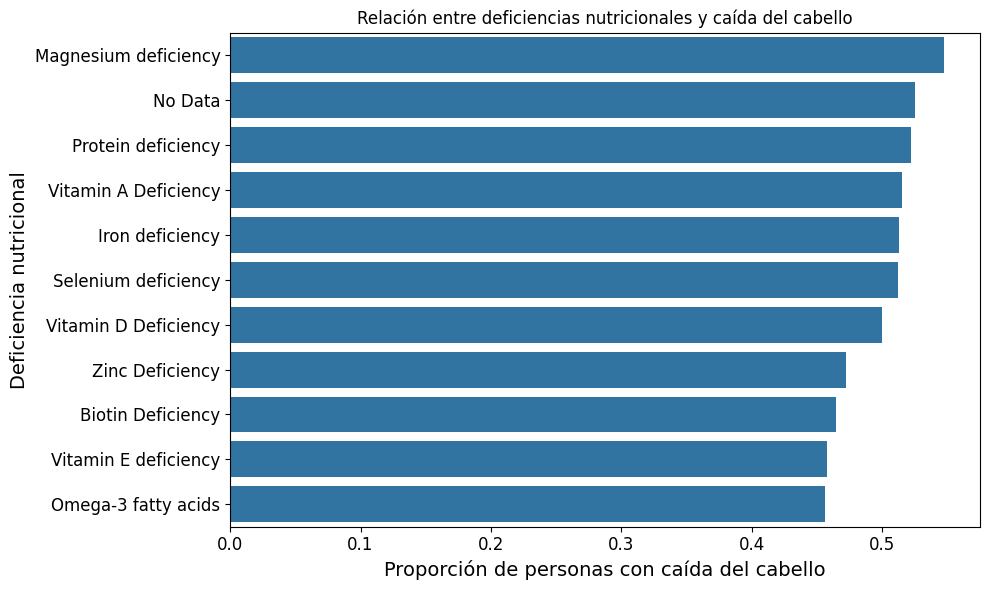

In [83]:
df_plot = df.groupby(df["Nutritional Deficiencies "].str.strip())["Hair Loss"].mean().reset_index()
df_plot = df_plot.sort_values(by="Hair Loss", ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x="Hair Loss", y="Nutritional Deficiencies ", data=df_plot)
plt.title("Relación entre deficiencias nutricionales y caída del cabello")
plt.xlabel("Proporción de personas con caída del cabello")
plt.ylabel("Deficiencia nutricional")
plt.tight_layout()
plt.show()


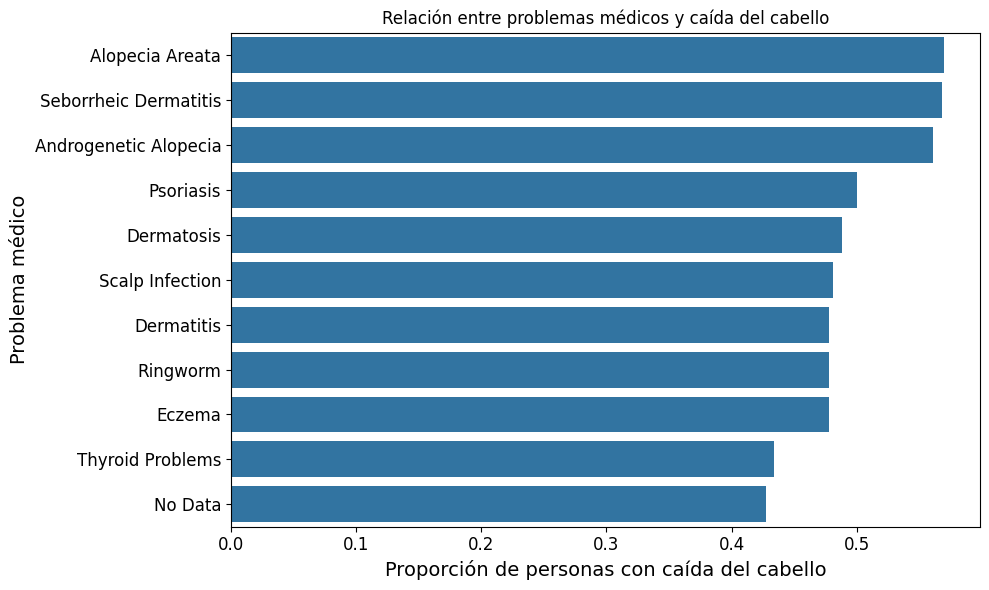

In [84]:
df_plot = df.groupby(df["Medical Conditions"].str.strip())["Hair Loss"].mean().reset_index()
df_plot = df_plot.sort_values(by="Hair Loss", ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x="Hair Loss", y="Medical Conditions", data=df_plot)
plt.title("Relación entre problemas médicos y caída del cabello")
plt.xlabel("Proporción de personas con caída del cabello")
plt.ylabel("Problema médico")
plt.tight_layout()
plt.show()

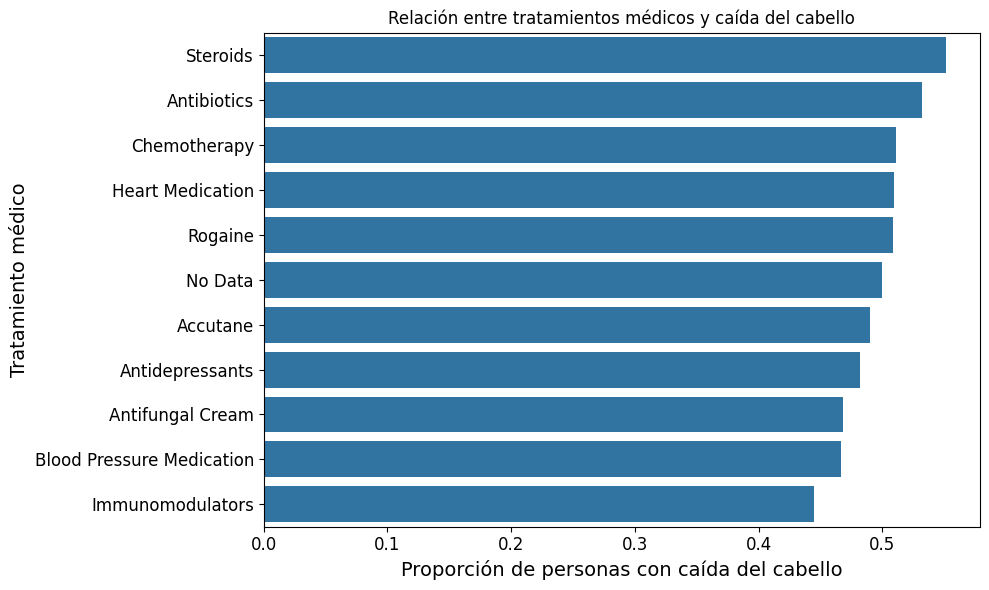

In [85]:
df_plot = df.groupby(df["Medications & Treatments"].str.strip())["Hair Loss"].mean().reset_index()
df_plot = df_plot.sort_values(by="Hair Loss", ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x="Hair Loss", y="Medications & Treatments", data=df_plot)
plt.title("Relación entre tratamientos médicos y caída del cabello")
plt.xlabel("Proporción de personas con caída del cabello")
plt.ylabel("Tratamiento médico")
plt.tight_layout()
plt.show()

<Axes: >

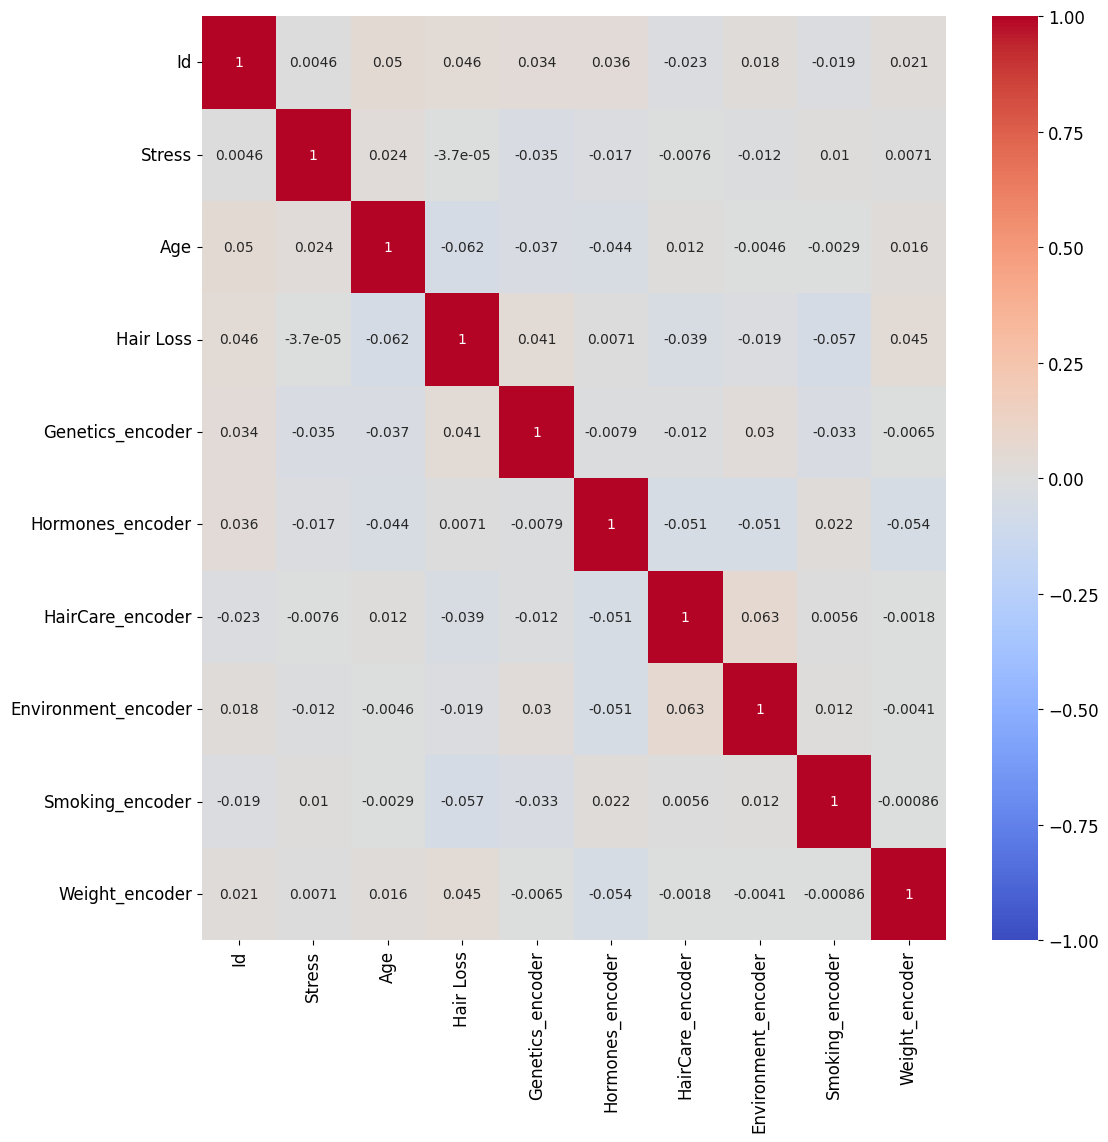

In [86]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

In [87]:
df = df.drop(columns = ["Genetics", "Hormonal Changes", "Poor Hair Care Habits ","Environmental Factors", "Smoking", "Weight Loss "])

In [88]:
df


,Id,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,133992,No Data,No Data,Magnesium deficiency,1,19,0,1.0,0.0,1.0,1.0,0.0,0.0
1,148393,Eczema,Antibiotics,Magnesium deficiency,2,43,0,0.0,0.0,1.0,1.0,0.0,0.0
2,155074,Dermatosis,Antifungal Cream,Protein deficiency,1,26,0,0.0,0.0,1.0,1.0,0.0,1.0
3,118261,Ringworm,Antibiotics,Biotin Deficiency,1,46,0,1.0,1.0,1.0,1.0,0.0,0.0
4,111915,Psoriasis,Accutane,Iron deficiency,1,30,1,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,0,33,1,1.0,0.0,1.0,1.0,1.0,1.0
995,164777,No Data,Accutane,Protein deficiency,0,47,0,1.0,1.0,0.0,0.0,0.0,1.0
996,143273,Androgenetic Alopecia,Antidepressants,Protein deficiency,1,20,1,0.0,1.0,1.0,0.0,1.0,1.0
997,169123,Dermatitis,Immunomodulators,Biotin Deficiency,1,32,1,0.0,1.0,1.0,1.0,1.0,1.0


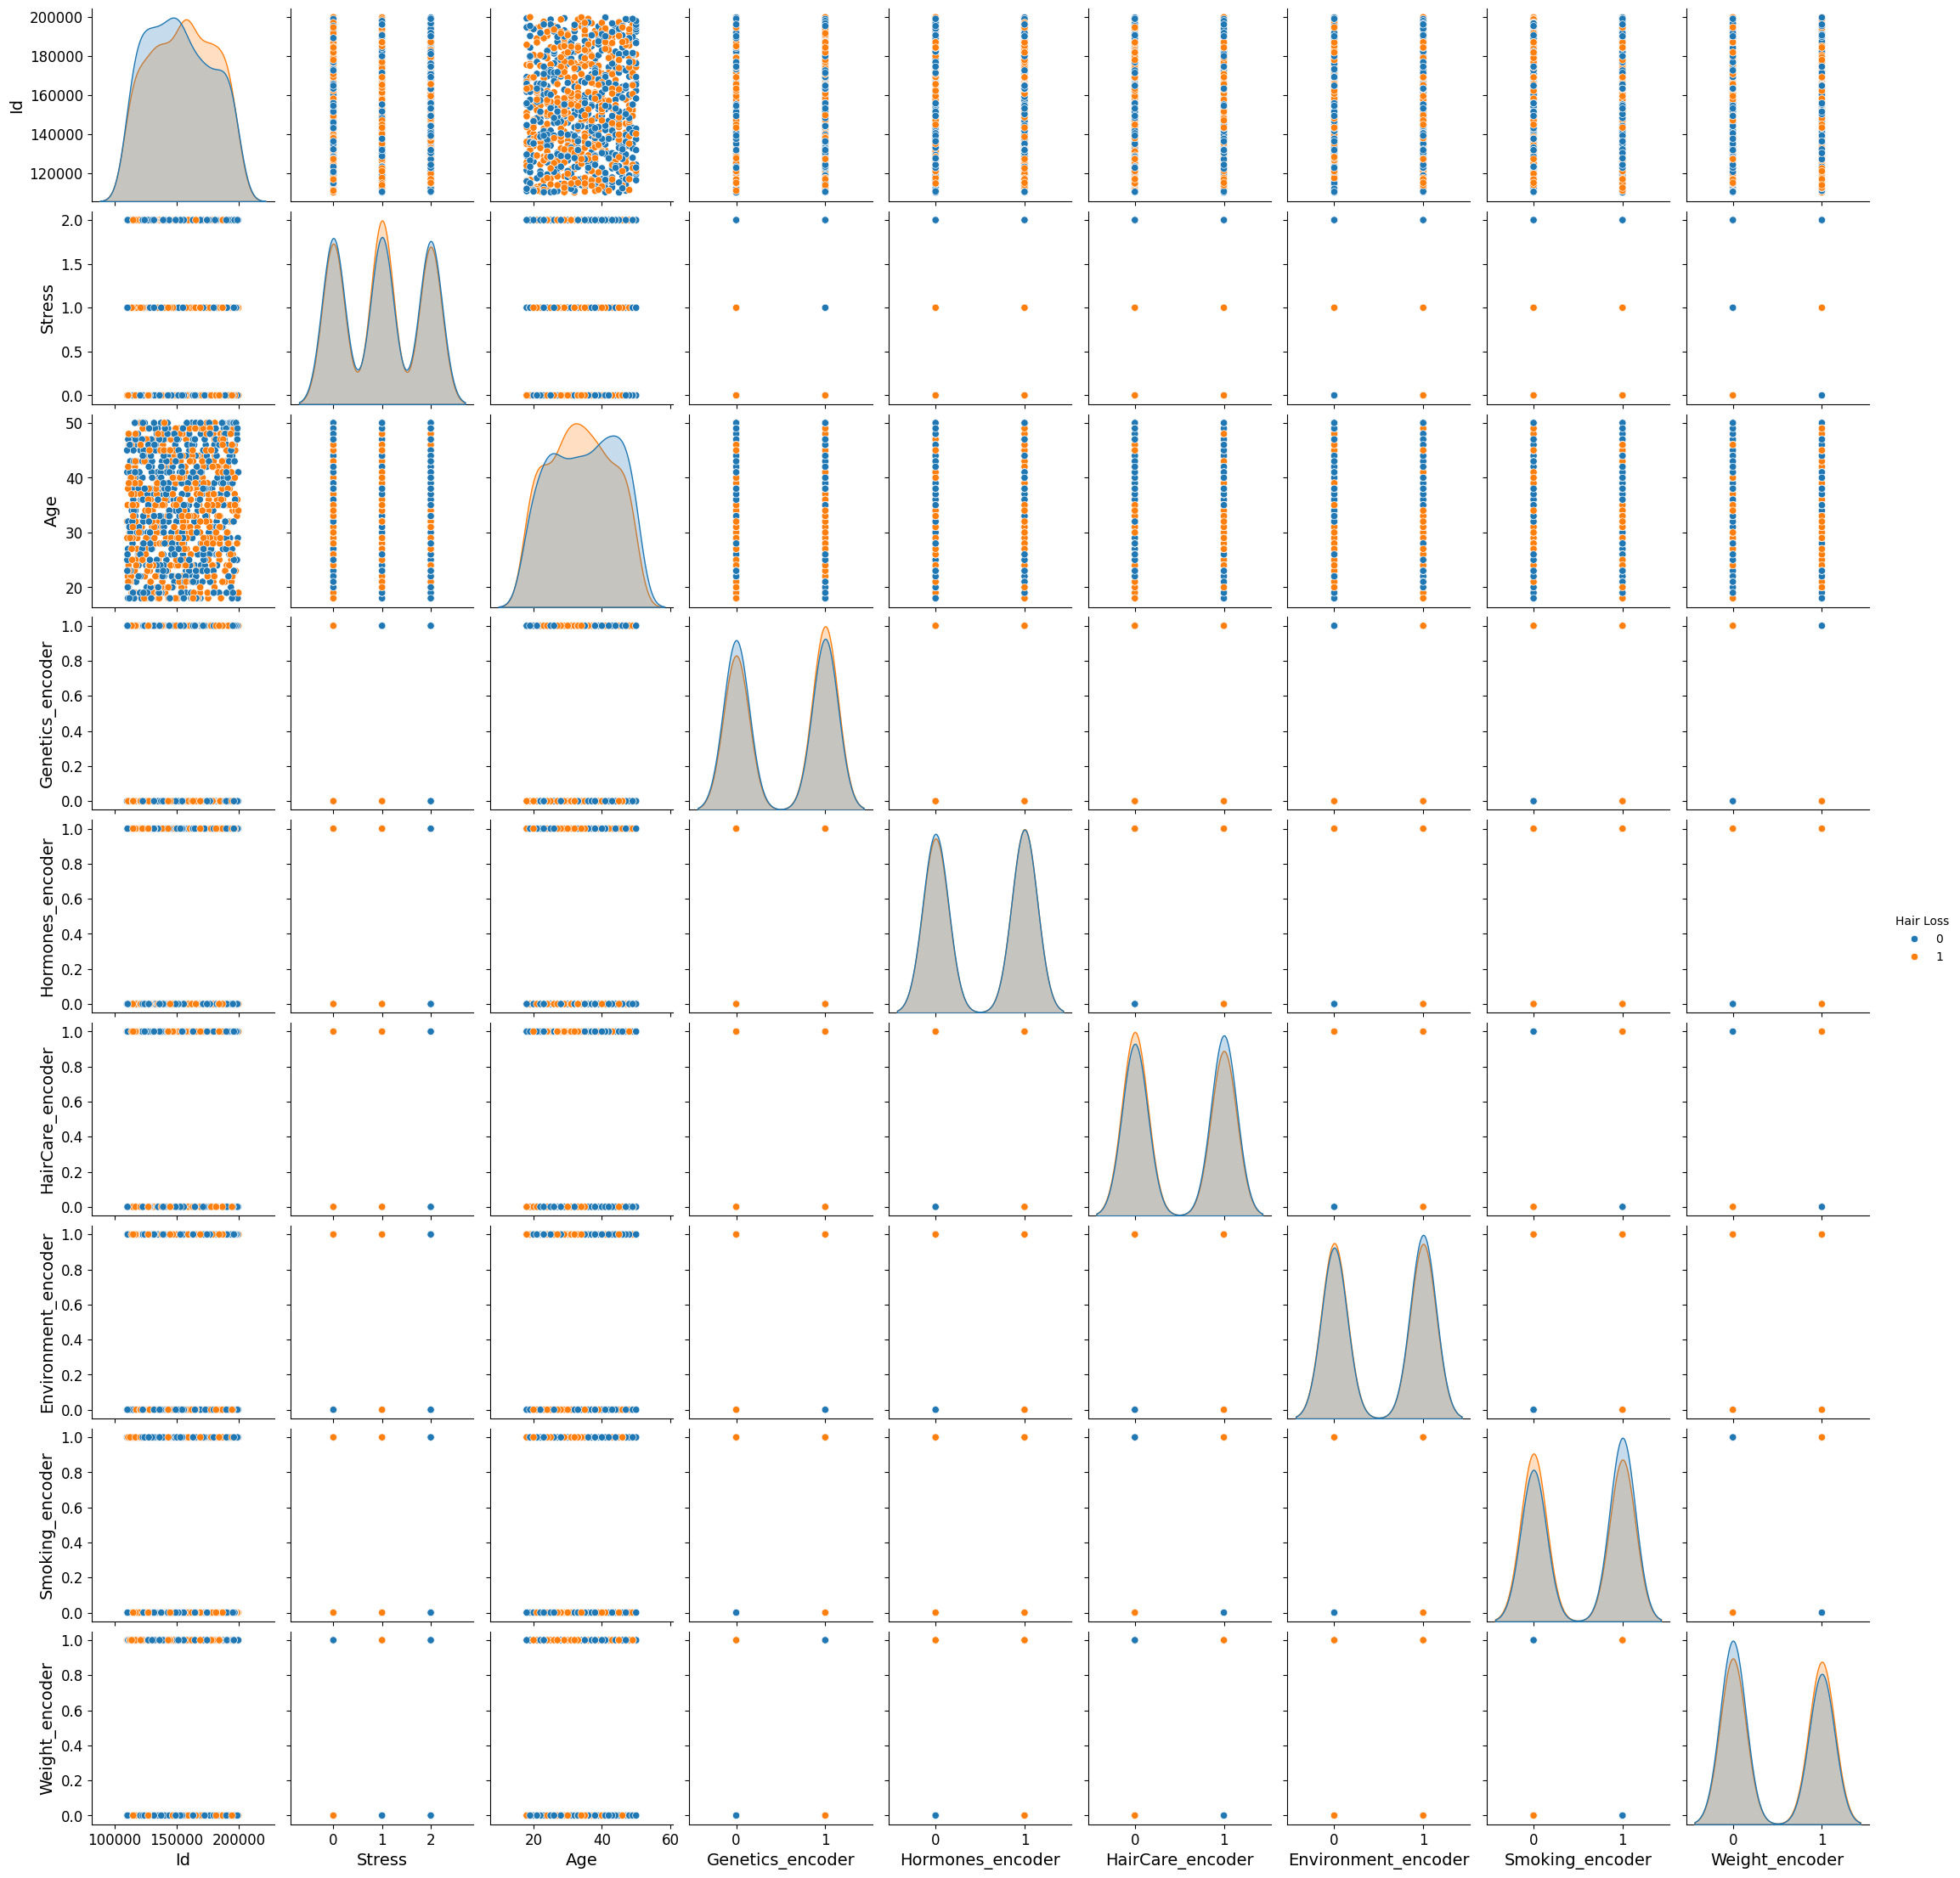

In [89]:
sns.pairplot(df, hue = "Hair Loss")

## MODELO 1: LOGISTIC REGRESSION

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         999 non-null    int64  
 1   Medical Conditions         999 non-null    object 
 2   Medications & Treatments   999 non-null    object 
 3   Nutritional Deficiencies   999 non-null    object 
 4   Stress                     999 non-null    int64  
 5   Age                        999 non-null    int64  
 6   Hair Loss                  999 non-null    int64  
 7   Genetics_encoder           999 non-null    float64
 8   Hormones_encoder           999 non-null    float64
 9   HairCare_encoder           999 non-null    float64
 10  Environment_encoder        999 non-null    float64
 11  Smoking_encoder            999 non-null    float64
 12  Weight_encoder             999 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 1

In [91]:
df.describe()

,Id,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,153354.673674,0.993994,34.188188,0.497497,0.522523,0.50951,0.492492,0.508509,0.519520,0.472472
std,25516.041985,0.805768,9.377980,0.500244,0.499743,0.50016,0.500194,0.500178,0.499869,0.499492
min,110003.000000,0.000000,18.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,131867.500000,0.000000,26.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,152951.000000,1.000000,34.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000
75%,174969.000000,2.000000,42.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,199949.000000,2.000000,50.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [110]:
X_lr = df[["Age","Genetics_encoder", "Hormones_encoder", 
        "HairCare_encoder", "Environment_encoder","Smoking_encoder","Weight_encoder", "Stress" ]]
y_lr = df["Hair Loss"]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 8)
(799,)
(200, 8)
(200,)


In [94]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [95]:
predictions = model.predict(X)
print(predictions)

[1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 0 0 0 1 0 1 1 

In [96]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.46 0.54]
 [0.57 0.43]
 [0.47 0.53]
 ...
 [0.48 0.52]
 [0.54 0.46]
 [0.47 0.53]]


In [97]:
modelo_log_r = LogisticRegression(max_iter = 1000)

In [98]:
"""modelo_log_r.fit(X_train, y_train)
y_pred = modelo_log_r.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))"""

'modelo_log_r.fit(X_train, y_train)\ny_pred = modelo_log_r.predict(X_test)\nprint("accuracy_score", accuracy_score(y_test, y_pred))'

In [112]:
model.score(X_lr, y_lr)


0.5455455455455456

In [100]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

NameError: name 'y_pred' is not defined

## MODELO 1B: LOGISTIC REGRESSION

In [ ]:
df_encoded.info()

NameError: name 'df_encoded' is not defined

In [ ]:
df_encoded['Genetics'] = df_encoded['Genetics'].replace({'yes': 1, 'no': 0})
df_encoded['Hormonal Changes'] = df_encoded['Hormonal Changes'].replace({'yes': 1, 'no': 0})
df_encoded['Poor Hair Care Habits '] = df_encoded['Poor Hair Care Habits '].replace({'yes': 1, 'no': 0})
df_encoded['Environmental Factors'] = df_encoded['Environmental Factors'].replace({'yes': 1, 'no': 0})
df_encoded['Smoking'] = df_encoded['Smoking'].replace({'yes': 1, 'no': 0})
df_encoded['Weight Loss '] = df_encoded['Weight Loss '].replace({'yes': 1, 'no': 0})



In [ ]:
X = df_encoded.drop(columns=["Hair Loss", "Id"])
y = df_encoded["Hair Loss"]

In [ ]:
df_encoded.head(1)

,Id,Genetics,Hormonal Changes,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,...,Medications & Treatments_Antibiotics,Medications & Treatments_Antidepressants,Medications & Treatments_Antifungal Cream,Medications & Treatments_Blood Pressure Medication,Medications & Treatments_Chemotherapy,Medications & Treatments_Heart Medication,Medications & Treatments_Immunomodulators,Medications & Treatments_No Data,Medications & Treatments_Rogaine,Medications & Treatments_Steroids
0,133992,Yes,No,1,19,Yes,Yes,No,No,0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 47)
(799,)
(200, 47)
(200,)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

ValueError: could not convert string to float: 'Yes'

In [ ]:
predictions = model.predict(X)
print(predictions)

[1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 1 1 1 0 1 0 0 0 1 1 

In [ ]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.49 0.51]
 [0.52 0.48]
 [0.49 0.51]
 ...
 [0.41 0.59]
 [0.62 0.38]
 [0.5  0.5 ]]


In [ ]:
model.score(X, y)

0.5725725725725725

## MODELO 2: KNN

In [ ]:
df.head()

,Id,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,133992,No Data,No Data,Magnesium deficiency,1,19,0,1.0,0.0,1.0,1.0,0.0,0.0
1,148393,Eczema,Antibiotics,Magnesium deficiency,2,43,0,0.0,0.0,1.0,1.0,0.0,0.0
2,155074,Dermatosis,Antifungal Cream,Protein deficiency,1,26,0,0.0,0.0,1.0,1.0,0.0,1.0
3,118261,Ringworm,Antibiotics,Biotin Deficiency,1,46,0,1.0,1.0,1.0,1.0,0.0,0.0
4,111915,Psoriasis,Accutane,Iron deficiency,1,30,1,0.0,0.0,0.0,1.0,1.0,0.0


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Stress'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Hair Loss'}>,
        <Axes: title={'center': 'Genetics_encoder'}>,
        <Axes: title={'center': 'Hormones_encoder'}>],
       [<Axes: title={'center': 'HairCare_encoder'}>,
        <Axes: title={'center': 'Environment_encoder'}>,
        <Axes: title={'center': 'Smoking_encoder'}>],
       [<Axes: title={'center': 'Weight_encoder'}>, <Axes: >, <Axes: >]],
      dtype=object)

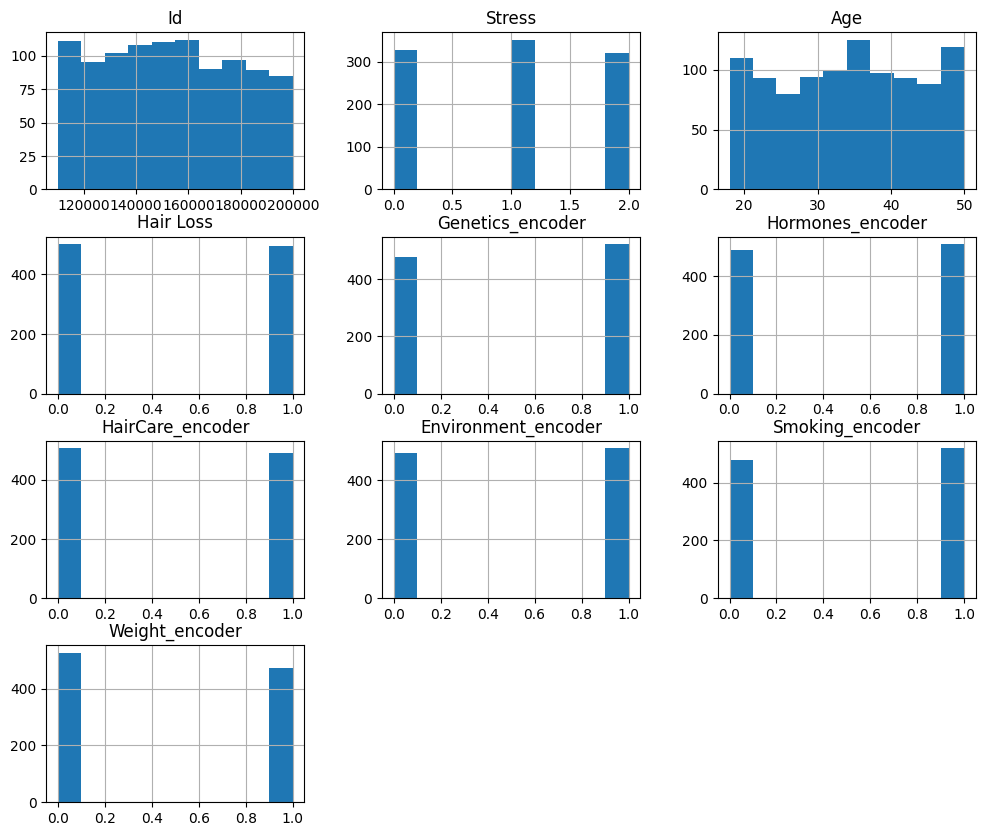

In [ ]:
df.hist(figsize=(12, 10))

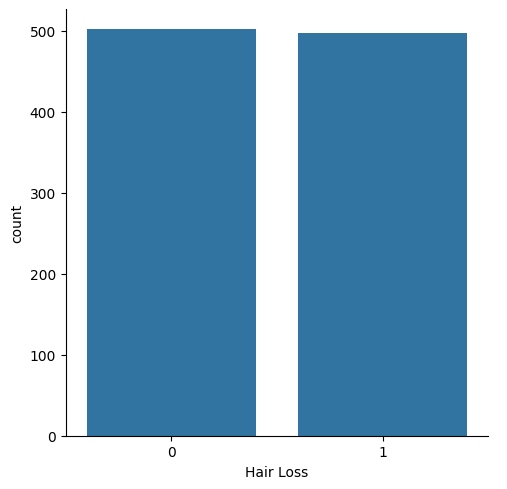

In [ ]:
sns.catplot(x= "Hair Loss", data = df, kind="count")


In [102]:
X_knn = df[["Age","Genetics_encoder", "Hormones_encoder", 
        "HairCare_encoder", "Environment_encoder","Smoking_encoder","Weight_encoder", "Stress" ]]
y_knn = df["Hair Loss"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_knn,y_knn, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 8)
(799,)
(200, 8)
(200,)


In [105]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_knn)
X_train_scaler = minmax_scaler.transform(X_train)
X_test_scaler = minmax_scaler.transform(X_test)

In [106]:
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=4)

In [107]:
pred = knn.predict(X_test_scaler)

print("Accuracy: ", accuracy_score(y_test, pred))
print("precision: ", precision_score(y_test, pred, average="micro"))
print("Recall: ", recall_score(y_test, pred, average="micro"))

Accuracy:  0.6
precision:  0.6
Recall:  0.6


<Axes: >

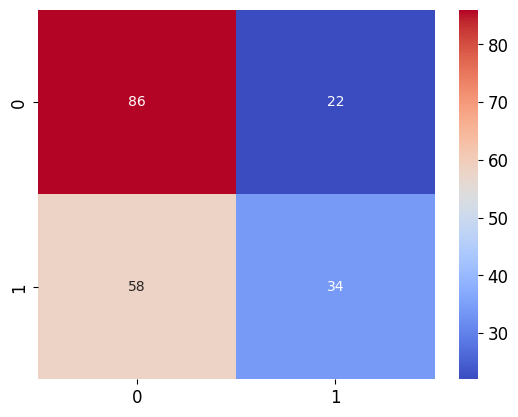

In [108]:
sns.heatmap(confusion_matrix(y_test, pred), cmap = "coolwarm",annot= True)

In [109]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.68       108
           1       0.61      0.37      0.46        92

    accuracy                           0.60       200
   macro avg       0.60      0.58      0.57       200
weighted avg       0.60      0.60      0.58       200



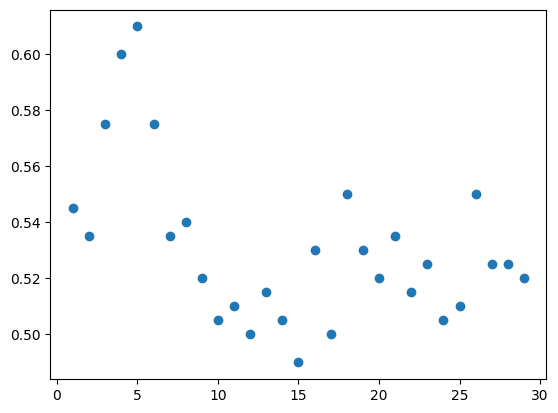

In [ ]:
k_range = range(1,30)
scores = []

for i in k_range:
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaler, y_train)
    pred_scores = knn.score(X_test_scaler, y_test)
    scores.append(pred_scores)

plt.scatter(k_range, scores)

In [ ]:
scores

[0.545,
 0.535,
 0.575,
 0.6,
 0.61,
 0.575,
 0.535,
 0.54,
 0.52,
 0.505,
 0.51,
 0.5,
 0.515,
 0.505,
 0.49,
 0.53,
 0.5,
 0.55,
 0.53,
 0.52,
 0.535,
 0.515,
 0.525,
 0.505,
 0.51,
 0.55,
 0.525,
 0.525,
 0.52]

In [ ]:
df['Hair Loss'].value_counts(normalize=True)

Hair Loss
0    0.502503
1    0.497497
Name: proportion, dtype: float64

## RANDOM FOREST

rf y boosting
one hot encoding--> columnas nuevas por medicamento etc (ver correlacion ahi). hacer heatmap y crear df nuevo con dichas columnas2

probar a convertir no data a datos utiles (medias y asi?)

---crear columnas con las medicaciones x ej, con get dummies? (confirmar) y luego heatmap con esas columnas y hair loss solo

In [ ]:
import scipy.stats as stats

for col in df.select_dtypes(include='number').columns:
    groups = [group[col].dropna() for name, group in df.groupby("Hair Loss")]
    f, p = stats.f_oneway(*groups)
    print(f"{col}: p = {p:.4f}")

#Si p es bajo (< 0.05), significa que esa variable discrimina bien entre las clases del target.

Id: p = 0.1431
Age: p = 0.0483
Hair Loss: p = 0.0000


C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [114]:
from sklearn.ensemble import RandomForestClassifier

X_rf = df[["Age","Genetics_encoder", "Hormones_encoder", 
        "HairCare_encoder", "Environment_encoder","Smoking_encoder","Weight_encoder", "Stress" ]]
y_rf = df["Hair Loss"]



In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
cv= KFold(10)
cv_bc = cross_val_score(estimator=bc, X=X, y=y, cv=cv, scoring="accuracy")

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=10)
cv_rfc = cross_val_score(estimator=rfc, cv=cv, X= X, y= y, scoring="accuracy")

NameError: name 'bc' is not defined

mirar GPT

hacer para RF?

In [ ]:
# Obtener importancia de las características
importances = clf.feature_importances_

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()